<a href="https://colab.research.google.com/github/JorgeSandon/Data_Science_Projects/blob/main/Human_Stress_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Human Stress Prediction**

La detección del estrés es una tarea difícil, ya que hay muchas palabras que la gente puede utilizar en sus publicaciones y que pueden mostrar si una persona está sufriendo estrés psicológico o no. busque conjuntos de datos que pueda utilizar para entrenar un modelo de aprendizaje automático para la detección del estrés.

El conjunto de datos contiene datos publicados en subreddits relacionados con la salud mental. Este conjunto de datos contiene diversos problemas de salud mental que la gente comparte sobre su vida. Afortunadamente, este conjunto de datos está etiquetado como 0 y 1, donde 0 indica ausencia de estrés y 1 indica estrés.

### **Descarga el dataset**

URL: https://www.kaggle.com/datasets/kreeshrajani/human-stress-prediction

In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

In [3]:
#Lectura del dataset
df = pd.read_csv("/content/drive/MyDrive/Kaggle/Stress.csv")

In [4]:
print("El dataset contiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataset contiene 2838 filas y 7 columnas


In [5]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [7]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

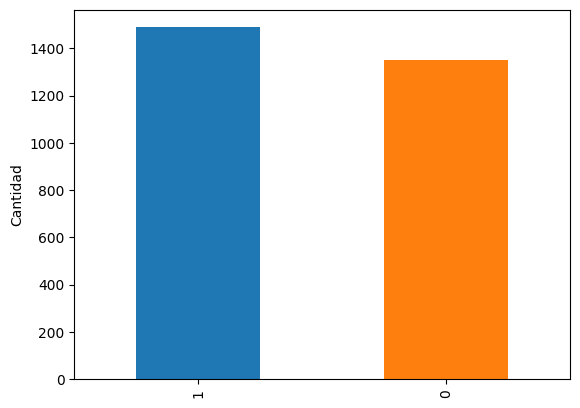

In [8]:
#Graficar, para ver si los datos de mi variable dependiente estan balanceados.
label = df['label']
unique_vals = label.value_counts()
unique_vals.plot(kind='bar', color = ['#1f77b4', '#ff7f0e'])
plt.ylabel("Cantidad")
plt.show()

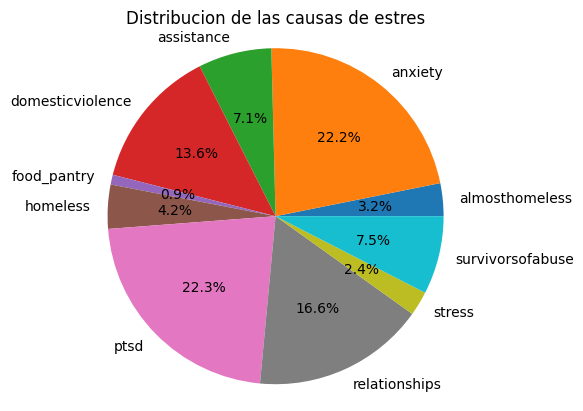

In [9]:
# Agrupar los valores de la columna 'subreddit' por los valores de la columna 'label' que son 1
grouped_df = df[df['label'] == 1].groupby('subreddit').size().reset_index(name='count')

# Graficar los valores agrupados en un gráfico de torta
plt.pie(grouped_df['count'], labels=grouped_df['subreddit'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribucion de las causas de estres')
plt.show()

### **Preprocesamiento de texto**

In [10]:
#Importar librerias
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [11]:
#Descargar recursos del paquete NLTK
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
#Ejemplo de un post
df["text"][4]

'October is Domestic Violence Awareness Month and I am a domestic violence survivor who is still struggling, even after over four years. Lately I have been feeling very angry. Angry that my abusive ex received no real consequences for his actions. This man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. I was granted a restraining order against him (and it was renewed a year later) but I was unable to press criminal charges against him because I didn’t have enough evidence to have a case.'

In [13]:
#Preprocesado de texto
corpus = []

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for i in range(df.shape[0]):
    text = re.sub("[^a-zA-Z]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(lemmatizer.lemmatize(word)) for word in text if not word in set(stopwords.words("english"))]
    text = " ".join(text)
    corpus.append(text)

### **Nubes de palabras para la condición de estrés**

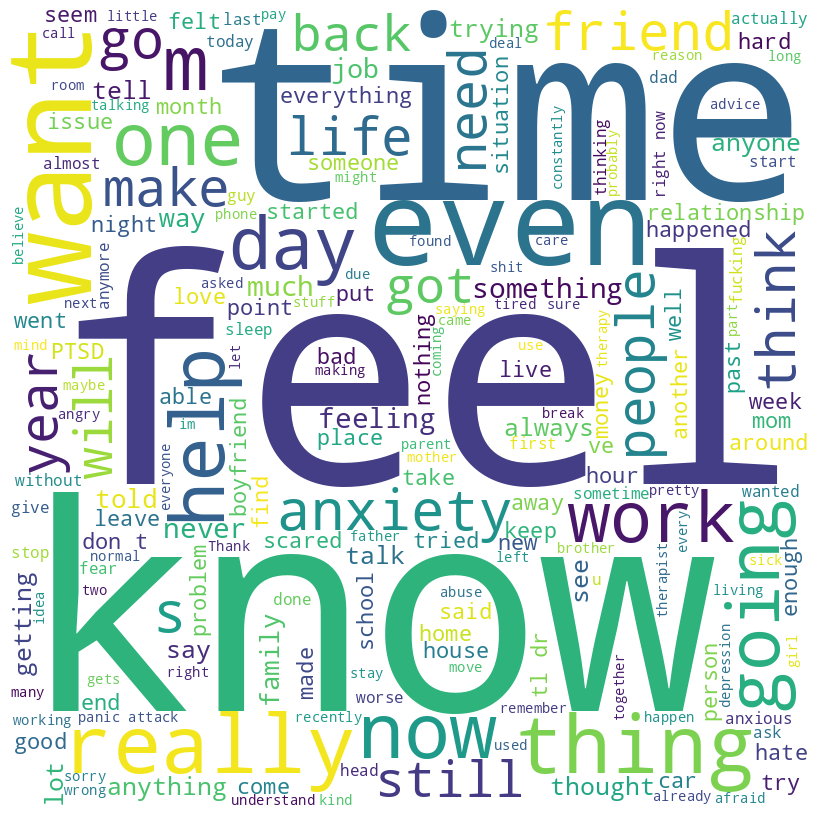

In [14]:
from wordcloud import WordCloud, STOPWORDS

# Unir todos los textos de la columna "text" en una sola cadena separada por espacios
texto = ' '.join(df[df['label'] == 1]['text'].tolist())

# Crear una instancia de la clase WordCloud, para luego mostrar la nube de palabras
nube_palabras = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(texto)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(nube_palabras)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#Dividir el conjunto de datos en X,y
X = CountVectorizer().fit_transform(corpus).toarray()
y = df['label']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Crear un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular la exactitud y la matriz de confusión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7147887323943662
Confusion matrix:
[[182  77]
 [ 85 224]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       259
           1       0.74      0.72      0.73       309

    accuracy                           0.71       568
   macro avg       0.71      0.71      0.71       568
weighted avg       0.72      0.71      0.72       568



In [17]:
# Crear un modelo de naive bayes
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular la exactitud y la matriz de confusión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7517605633802817
Confusion matrix:
[[168  91]
 [ 50 259]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       259
           1       0.74      0.84      0.79       309

    accuracy                           0.75       568
   macro avg       0.76      0.74      0.75       568
weighted avg       0.75      0.75      0.75       568



In [18]:
from sklearn.model_selection import cross_val_score

# Crear un modelo de Bernoulli Naive Bayes
model = BernoulliNB()

# Realizar la validación cruzada con 10 folds
scores = cross_val_score(model, X, y, cv=10)

# Imprimir los resultados de la validación cruzada
print("Exactitud media: ", scores.mean())
print("Desviación estándar: ", scores.std())


Exactitud media:  0.7364492609366445
Desviación estándar:  0.03235175199593764


En el caso del modelo de Bernoulli, la exactitud promedio obtenida mediante la validación cruzada es muy similar a la exactitud obtenida en el conjunto de prueba, es probable que el modelo no esté sobreajustado. Lo que indica que el modelo es relativamente estable y generaliza bien a datos nuevos.